# $$\textit{Power}$$
$$\text{Schwartz}$$



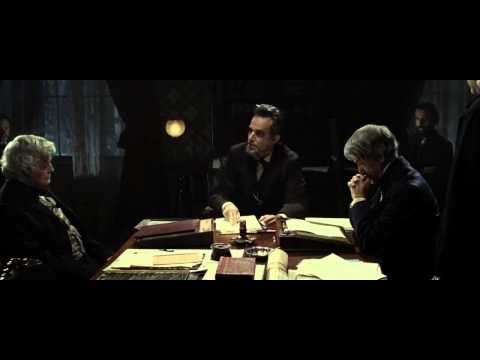

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("1qjtugr2618")

In [2]:
# say you've got a sample

from scipy import stats
#sample = stats.poisson.rvs(mu=10, size=30)

sample

NameError: name 'sample' is not defined

# Say you've got a hypothesis 

# $H_0: \mu \leq 5$

# What test statistic will you use to test your hypothesis?

In [3]:































import numpy as np

#np.mean(sample)

# why $\bar X$?

# $\begin{align}
E[\bar X] &= \mu\\
Var[\bar X] &= Var[X]/n \\
&= \sigma^2_X/n
\end{align}$

# What is the sampling distribution of $\bar X$?

# $\bar X \sim Normal\left(E[\bar x], Var[X]/n\right) = Normal\left(\mu, \sigma_X^2/n\right)$
### (by the Central Limit Theorem)
# What is the sampling distribution of $\frac{\bar X-\mu}{\sigma_X/\sqrt{n}}$?

# $Normal(0,1)$

### (by the Central Limit Theorem and properties of expectation and variance)

# Wait... what is $\sigma^2_X$?

# We'll estimate it with $s = \sqrt{\sum_{i=1}^n\frac{(x_i-\bar x)^2}{n-1}}$

In [4]:
#s2 = sum((x-np.mean(x))**2/n-1
#s2 = np.var(x,ddof=1)
s2

NameError: name 's2' is not defined

# What is the sampling distribution of $\frac{\bar x-\mu}{\sqrt{\frac{\sum_{i=1}^n\frac{(x_i-\bar x)^2}{n-1}}{n}}} = \frac{\bar x-\mu}{s/\sqrt{n}}$?

# $t_{(n-1)}$

### (where $n-1$ is the degrees of freedom)

# How will we decide if we reject $H_0$?

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

0.050000000000000044

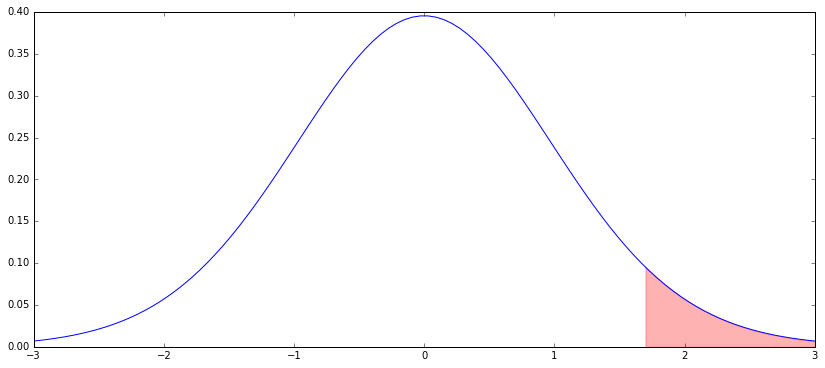

In [6]:
n = 30
support = np.linspace(-3,3,100)
plt.plot(support, stats.t.pdf(support, df=n-1))

critical_cutoff = stats.t.ppf(.95, n-1)
critical_area = np.linspace(critical_cutoff,3,10)
plt.fill_between(critical_area, stats.t.pdf(critical_area, n-1), 0, alpha=.3, color="red")

1-stats.t.cdf(critical_cutoff, df=n-1)

In [10]:
# So what is a p-value of xbar?

xbar = 10.9
s2 = 10. # remember this had an "n-1" in the denomenator
n = 50
mu = 10

test_statistic = (xbar - mu)/np.sqrt(s2/n)
test_statistic

2.0124611797498115

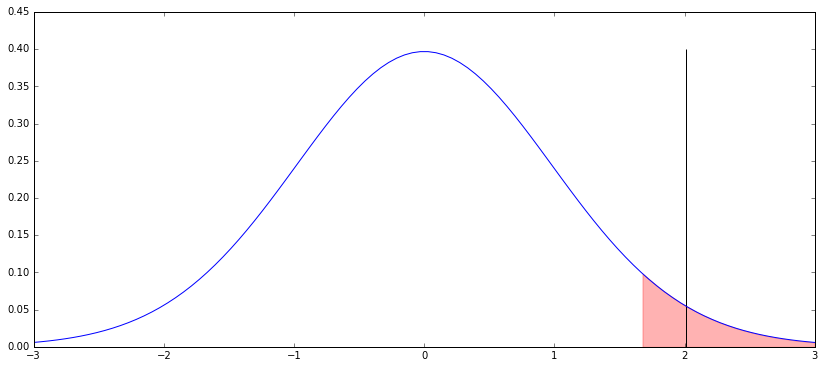

In [11]:
plt.plot(support, stats.t.pdf(support, df=n-1))

critical_cutoff = stats.t.ppf(.95, n-1)
critical_area = np.linspace(critical_cutoff,3,10)
plt.fill_between(critical_area, stats.t.pdf(critical_area, n-1), 0, alpha=.3, color="red")

plt.vlines(test_statistic, 0, .4)

0.024842261346730177

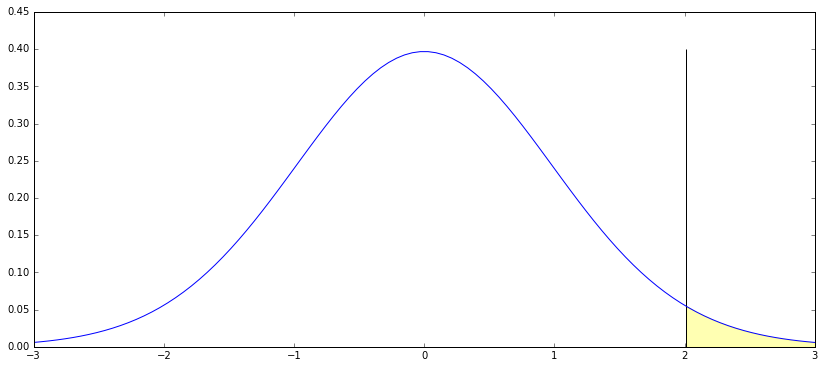

In [12]:
plt.plot(support, stats.t.pdf(support, df=n-1))

plt.vlines(test_statistic, 0, .4)
p_value_area=np.linspace(test_statistic,3,10)
plt.fill_between(p_value_area, stats.t.pdf(p_value_area, n-1), 0, alpha=.3, color="yellow")

1-stats.t.cdf(test_statistic, df=n-1)

# What was the chance that we rejected $H_0$?

# You don't have enough information!!

# Was $H_0$ true?

# Then we chose the chance of rejecting $H_0$ to be an "unlikely" 0.05.

<br>

# $\underline{Power} \text{ rather asks: what was the chance that we rejected } H_0 \underline{\text{ if $H_A$ is true}}$?

### (As opposed to $H_0$)

# Okay, what is $H_A$?

# Let's say

# $\begin{align}
H_0: &\mu = 10\\
H_A: &\mu = 12
\end{align}$

# (So _Effect Size_ is +2)

0.962830935664


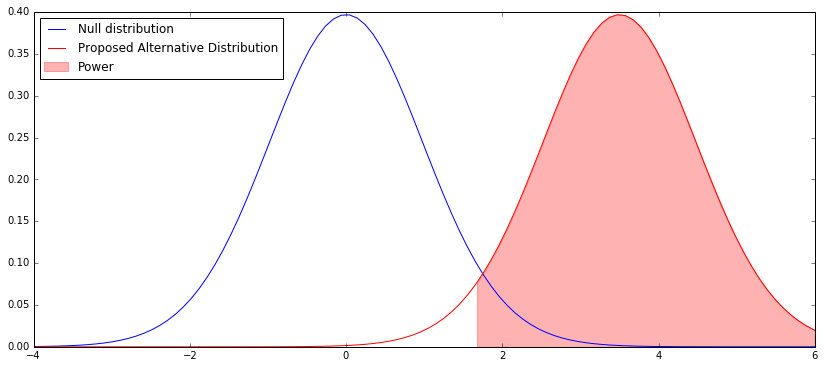

In [15]:
H_0 = 10
H_A = 13.5

support = np.linspace(-4,6,100)
plt.plot(support, stats.t.pdf(support, loc = H_0 - H_0, df=n-1), color='b')
plt.plot(support, stats.t.pdf(support, loc = H_A - H_0, df=n-1), color='r')

critical_area = np.linspace(critical_cutoff,6,100)
plt.fill_between(critical_area, stats.t.pdf(x=critical_area, loc = H_A - H_0, df=n-1), 0, alpha=.3, color="red")
print 1-stats.t.cdf(x=critical_cutoff, loc = H_A - H_0, df= n - 1)
plt.legend(["Null distribution", "Proposed Alternative Distribution", "Power"],loc="best")
tmp = plt.xlim([-4,6])

# Let's say

# $\begin{align}
H_0: &\mu = 10\\
H_A: &\mu = 13.5
\end{align}$

# (So _Effect Size_ is +3.5)

<br>
<br> 

# What else can we do to increase power?
# How can we decrease power?


11.1630871537


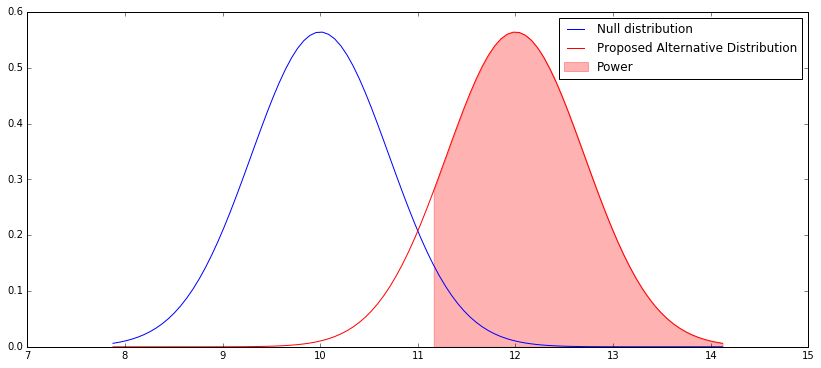

In [25]:
H_0 = 10
H_A = 12

s2 = 10. # remember this had an "n-1" in the denomenator
n = 20
mu = H_0

support = np.linspace(min(H_0,H_A)-3*np.sqrt(s2/n),max(H_0,H_A)+3*np.sqrt(s2/n),100)
plt.plot(support, stats.norm.pdf(support, loc = H_0, scale = np.sqrt(s2/n)), color='b')
plt.plot(support, stats.norm.pdf(support, loc = H_A, scale = np.sqrt(s2/n)), color='r')

critical_cutoff = stats.norm.ppf(0.95, loc = H_0, scale = np.sqrt(s2/n))
print critical_cutoff
critical_area = np.linspace(critical_cutoff,max(H_0,H_A)+3*np.sqrt(s2/n),100)
plt.fill_between(critical_area, stats.norm.pdf(x=critical_area, loc = H_A, scale = np.sqrt(s2/n)), 0, alpha=.3, color="red")
plt.legend(["Null distribution", "Proposed Alternative Distribution", "Power"],loc="best")